### Capítulo 3 - Medidas-Resumo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def tabela_frequencia(tabela, coluna): 
    '''
    Função que gera tabela de distribuição de frequências para a coluna de uma tabela desejada.
    '''
    if type(tabela[f'{coluna}'][0]) == str:
        freq_abs = tabela[f'{coluna}'].value_counts()
        freq_rel = tabela[f'{coluna}'].value_counts(normalize=True)*100
        freq_acum = freq_rel.cumsum()
        dist_freq = pd.DataFrame({'Frequência Absoluta': freq_abs, 'Frequência Relativa': round(freq_rel,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq
    else:
        k = round(1 + np.log2(len(tabela[f'{coluna}']))) # número de classes
        lsup = tabela[f'{coluna}'].max() # limite superior
        linf = tabela[f'{coluna}'].min() # limite inferior
        amplitude = lsup - linf # amplitude
        intervalo = amplitude/k # intervalo
        classes = []
        for i in range(k):
            classes.append(round(linf + i*intervalo, 2))

        labels = []
        for i in range(len(classes)-1):
            labels.append(f'{classes[i]} a {classes[i+1]}')

        frequencia = pd.value_counts(pd.cut(x=tabela[f'{coluna}'], bins=classes, labels=labels, include_lowest=True), sort=False)
        percentual = pd.value_counts(pd.cut(x = tabela[f'{coluna}'],bins = classes, labels = labels,include_lowest = True), normalize = True, sort=False)*100
        freq_acum = percentual.cumsum()

        dist_freq = pd.DataFrame({'Frequência Absoluta': frequencia, 'Frequência Relativa': round(percentual,2), 'Frequência Acumulada': round(freq_acum,2)})
        return dist_freq

##### Questão 1) Com base na tabela do livro, responda:
- a) Qual a média de erros por página?
- b) Qual a mediana de erros por página?
- c) Qual o desvio padrão de erros por página?
- d) Fazer representação gráfica para a distribuição
- e) Se o livro tivesse  500 páginas, qual o total de erros esperados?

In [6]:
conjunto = [0]*25 + [1]*20 + [2]*3 + [3]*1 + [4]*1

- a) Média

In [13]:
np.mean(conjunto)

0.66

- b) Mediana

In [14]:
np.mean(conjunto)

0.66

- C) Desvio Padrão

In [15]:
np.std(conjunto)

0.8392854103342915

- d) Gráfico

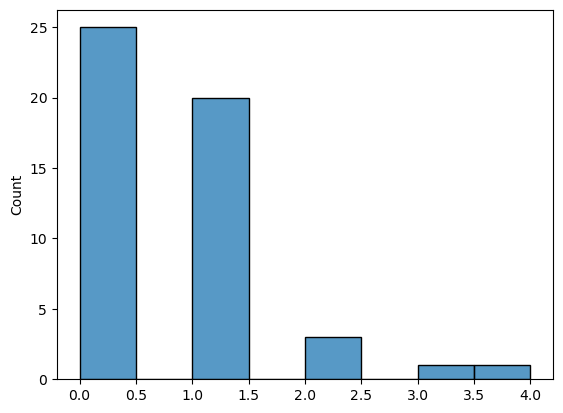

In [20]:
sns.histplot(conjunto)
plt.show()